In [1]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
 ]
users

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'}]

In [5]:
 friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
 (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]
friendships

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [13]:
for user in users:
    user["friends"]=[]
    print(user)

{'id': 0, 'name': 'Hero', 'friends': []}
{'id': 1, 'name': 'Dunn', 'friends': []}
{'id': 2, 'name': 'Sue', 'friends': []}
{'id': 3, 'name': 'Chi', 'friends': []}
{'id': 4, 'name': 'Thor', 'friends': []}
{'id': 5, 'name': 'Clive', 'friends': []}
{'id': 6, 'name': 'Hicks', 'friends': []}
{'id': 7, 'name': 'Devin', 'friends': []}
{'id': 8, 'name': 'Kate', 'friends': []}
{'id': 9, 'name': 'Klein', 'friends': []}


In [17]:
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])
    print(users)

[{'id': 0, 'name': 'Hero', 'friends': [{'id': 1, 'name': 'Dunn', 'friends': [{'id': 2, 'name': 'Sue', 'friends': [{'id': 3, 'name': 'Chi', 'friends': [{'id': 4, 'name': 'Thor', 'friends': [{'id': 5, 'name': 'Clive', 'friends': [{'id': 6, 'name': 'Hicks', 'friends': [{'id': 8, 'name': 'Kate', 'friends': [{'id': 9, 'name': 'Klein', 'friends': []}]}]}, {'id': 7, 'name': 'Devin', 'friends': [{'id': 8, 'name': 'Kate', 'friends': [{'id': 9, 'name': 'Klein', 'friends': []}]}]}]}]}]}]}, {'id': 3, 'name': 'Chi', 'friends': [{'id': 4, 'name': 'Thor', 'friends': [{'id': 5, 'name': 'Clive', 'friends': [{'id': 6, 'name': 'Hicks', 'friends': [{'id': 8, 'name': 'Kate', 'friends': [{'id': 9, 'name': 'Klein', 'friends': []}]}]}, {'id': 7, 'name': 'Devin', 'friends': [{'id': 8, 'name': 'Kate', 'friends': [{'id': 9, 'name': 'Klein', 'friends': []}]}]}]}]}]}, {...}]}, {'id': 2, 'name': 'Sue', 'friends': [{'id': 3, 'name': 'Chi', 'friends': [{'id': 4, 'name': 'Thor', 'friends': [{'id': 5, 'name': 'Clive', 

In [25]:
def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"])
total_connections = sum(number_of_friends(user) for user in users)
total_connections

36

In [27]:
from __future__ import division
num_users = len(users)
avg_connections = total_connections/ num_users
avg_connections

3.6

In [39]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
sorted(num_friends_by_id, key=lambda user_tuple: user_tuple[1], reverse=True)

[(1, 5),
 (5, 5),
 (0, 4),
 (2, 4),
 (3, 4),
 (8, 4),
 (4, 3),
 (6, 3),
 (7, 3),
 (9, 1)]

In [43]:
def friends_of_friend_ids_bad(user):
    return [foaf["id"]
        for friend in user["friends"]     
        for foaf in friend["friends"]] 

In [47]:
print ([friend["id"] for friend in users[0]["friends"]])
print ([friend["id"] for friend in users[1]["friends"]]) 
print ([friend["id"] for friend in users[2]["friends"]]) 

[1, 2, 1, 2]
[2, 3, 0, 2, 3]
[3, 0, 1, 3]


In [51]:
from collections import Counter                       
def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]
def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
        for friend in user["friends"])
def friends_of_friend_ids(user):
    return Counter(foaf["id"]
        for friend in user["friends"]    
        for foaf in friend["friends"]    
        if not_the_same(user, foaf) and not_friends(user, foaf))     
print (friends_of_friend_ids(users[3]))        

Counter({5: 4, 0: 2})


In [55]:
 interests = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
 (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decision trees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
 (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")
 ]
interests

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'NoSQL'),
 (1, 'MongoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'artificial intelligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

In [57]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [63]:
from collections import defaultdict
# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
 interests_by_user_id[user_id].append(interest)

In [65]:
def most_common_interests_with(user):
    return Counter(interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"])

In [67]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
 (48000, 0.7), (76000, 6),
 (69000, 6.5), (76000, 7.5),
 (60000, 2.5), (83000, 10),
 (48000, 1.9), (63000, 4.2)]
salaries_and_tenures

[(83000, 8.7),
 (88000, 8.1),
 (48000, 0.7),
 (76000, 6),
 (69000, 6.5),
 (76000, 7.5),
 (60000, 2.5),
 (83000, 10),
 (48000, 1.9),
 (63000, 4.2)]

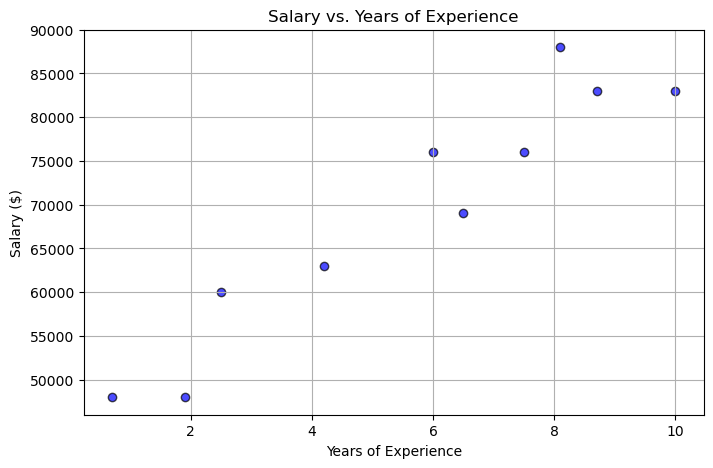

In [74]:
import matplotlib.pyplot as plt
salaries = [salary for salary, tenure in salaries_and_tenures]
tenures = [tenure for salary, tenure in salaries_and_tenures]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(tenures, salaries, color='blue', alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.title("Salary vs. Years of Experience")
plt.grid(True)

# Show plot
plt.show()

In [98]:
# keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
print(salary_by_tenure)
# keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()}
print(average_salary_by_tenure)


defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})
{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


In [100]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [104]:
# keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
print(salary_by_tenure_bucket)

defaultdict(<class 'list'>, {'more than five': [83000, 88000, 76000, 69000, 76000, 83000], 'less than two': [48000, 48000], 'between two and five': [60000, 63000]})


In [112]:
 # keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}
print(average_salary_by_bucket)

{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


In [114]:
interests = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decision trees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
 (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")
 ]
interests

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'NoSQL'),
 (1, 'MongoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'artificial intelligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

In [120]:
words_and_counts = Counter(word
                            for user, interest in interests
                            for word in interest.lower().split())
print(words_and_counts)

Counter({'big': 3, 'data': 3, 'java': 3, 'python': 3, 'learning': 3, 'hadoop': 2, 'hbase': 2, 'cassandra': 2, 'scikit-learn': 2, 'r': 2, 'statistics': 2, 'regression': 2, 'probability': 2, 'machine': 2, 'neural': 2, 'networks': 2, 'spark': 1, 'storm': 1, 'nosql': 1, 'mongodb': 1, 'postgres': 1, 'scipy': 1, 'numpy': 1, 'statsmodels': 1, 'pandas': 1, 'decision': 1, 'trees': 1, 'libsvm': 1, 'c++': 1, 'haskell': 1, 'programming': 1, 'languages': 1, 'mathematics': 1, 'theory': 1, 'mahout': 1, 'deep': 1, 'artificial': 1, 'intelligence': 1, 'mapreduce': 1})


In [124]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print (word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
